In [11]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [12]:
# loading dataset into datraframe named df

df= pd.read_csv("dataframe_.csv")
df.head(10)

input      output
0 -122.740667 -130.572085
1 -121.531419 -129.938929
2 -134.917019 -130.141832
3 -120.605951 -125.760932
4 -129.894781 -112.785214
5 -134.366669 -116.000000
6 -115.563739 -126.267621
7 -132.080161 -132.032206
8 -133.366669 -114.000000
9 -119.524112  -94.419855

In [13]:
len(df)   #length of the dataset

1697

In [19]:
df.info() # basic information on the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


In [20]:
df.describe() #data description

input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495

In [14]:
df.isnull().sum() # checking for null values, found one null value

input     1
output    1
dtype: int64

In [15]:
df.dropna(inplace=True) # dropped the null values

In [16]:
df.isnull().sum() # no null values

input     0
output    0
dtype: int64

In [17]:
df.duplicated().sum() #checking for duplicate values

606

In [24]:
df.drop_duplicates(inplace=True) #dropped the duplicate values

In [26]:
df.duplicated().sum() # no null values

0

In [27]:
len(df) #length of the dataframe after removing null & duplicated values

1090

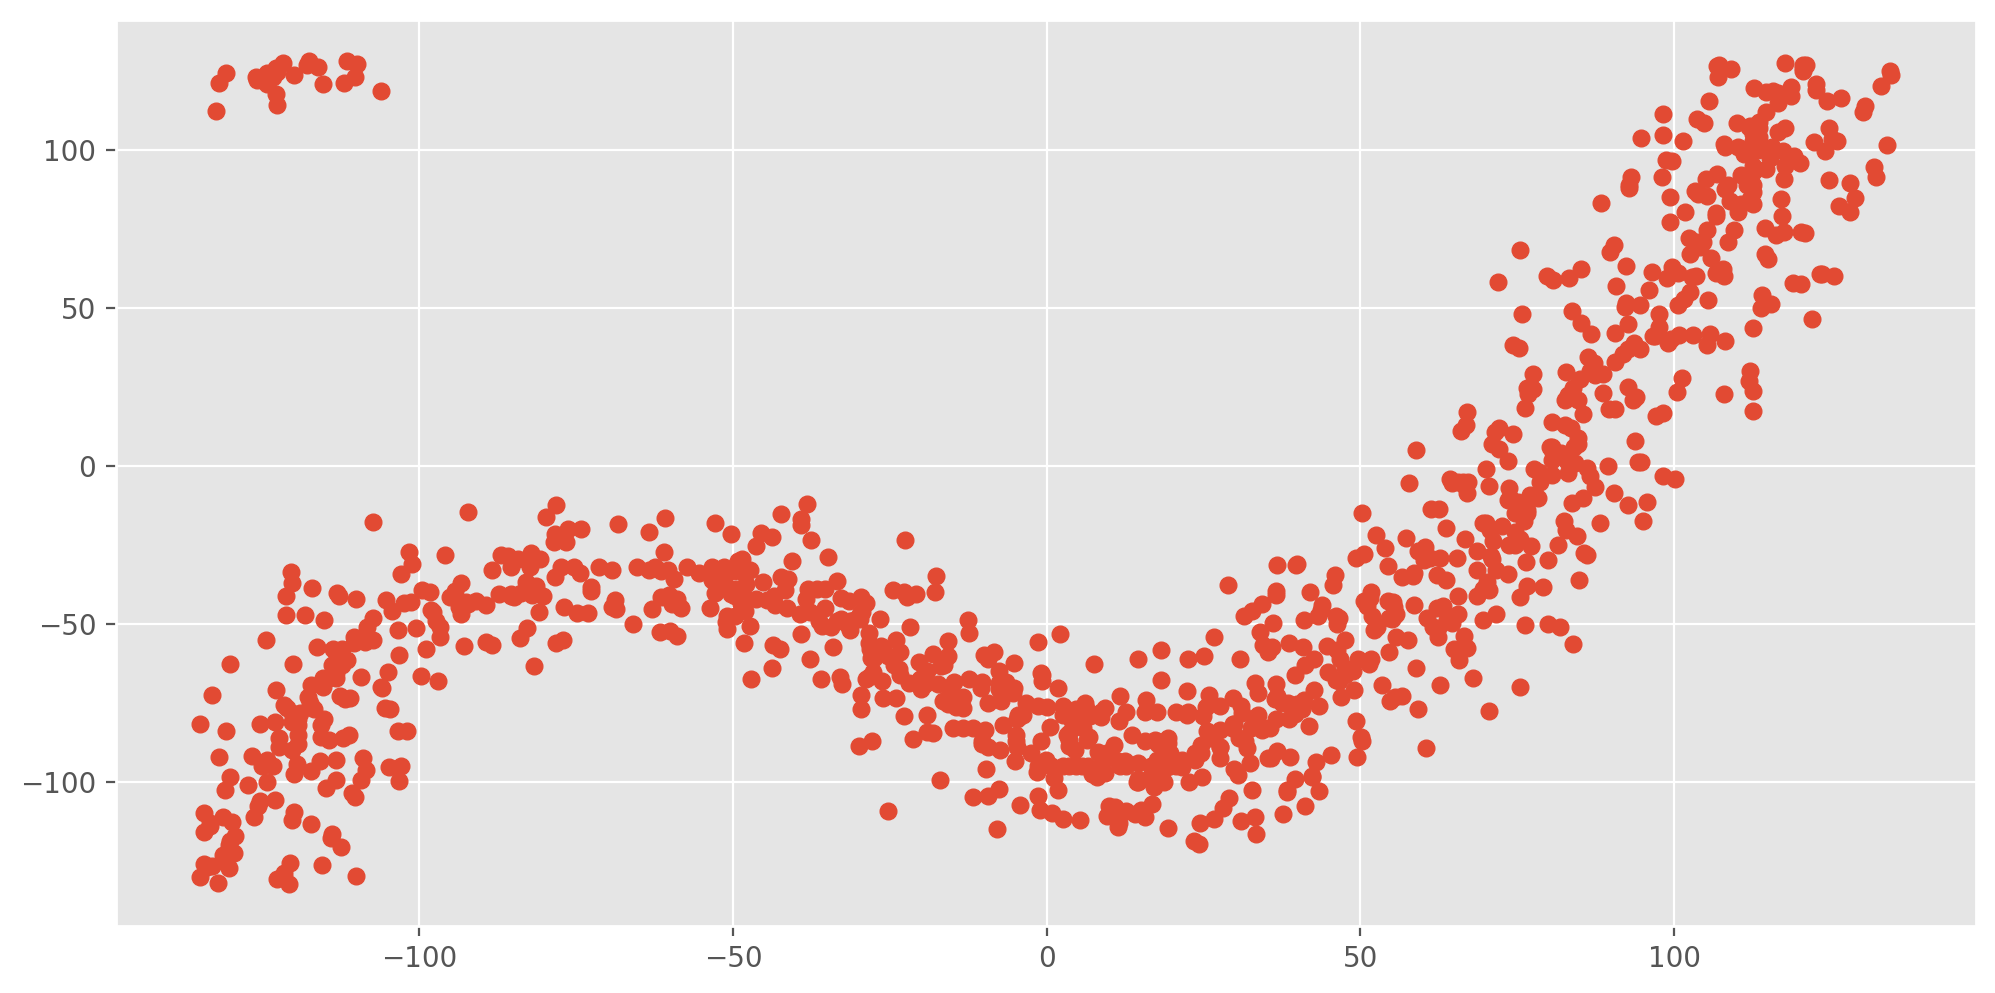

In [54]:
# scatter plot of the data for vizual representation
plt.figure(figsize=(12,6),dpi=200)
plt.scatter(x='input',y='output',data=df)

##### The relation between input and output is non-linear

{'whiskers': [<matplotlib.lines.Line2D at 0x274885d6b80>,
 'caps': [<matplotlib.lines.Line2D at 0x27489205160>,
 'boxes': [<matplotlib.lines.Line2D at 0x274885d68b0>],
 'medians': [<matplotlib.lines.Line2D at 0x27489205700>],
 'fliers': [<matplotlib.lines.Line2D at 0x274892059d0>],
 'means': []}

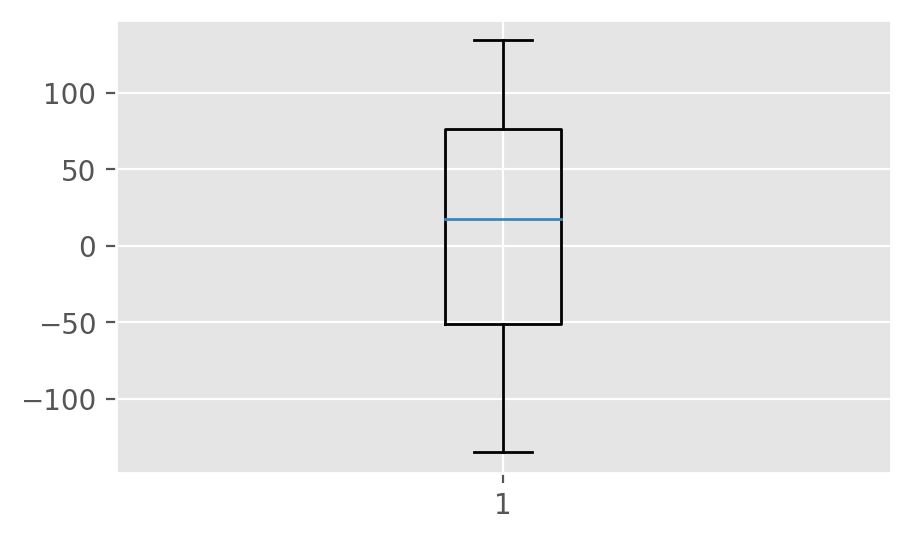

In [36]:
#checking for outliers in the input using boxplot
plt.figure(figsize=(5,3),dpi=200)
plt.boxplot(df['input'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2748a5806a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2748a580c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2748a5803d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2748a58b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2748a58b4f0>],
 'means': []}

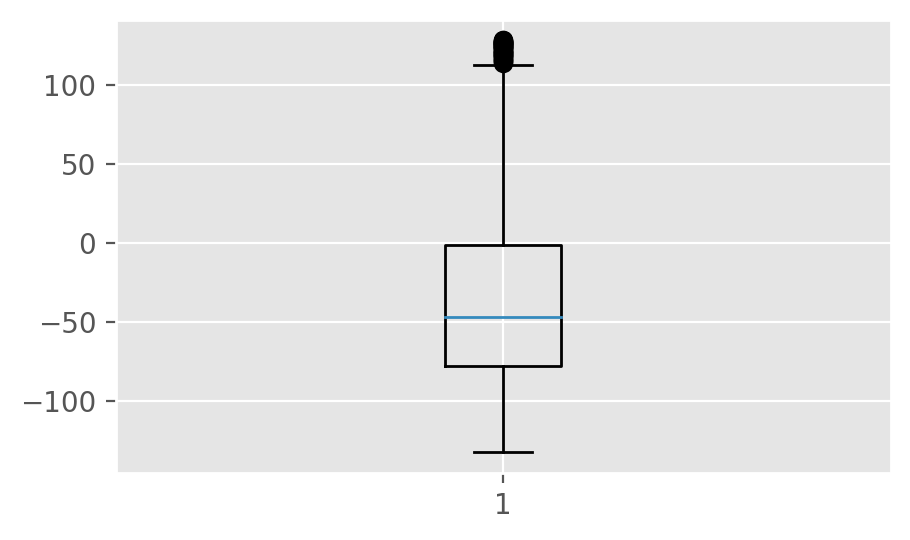

In [44]:
# checking for outliers in the output column using boxplot

plt.figure(figsize=(5,3),dpi=200)
plt.boxplot(df['output'])

##### There are outliers present in the output column

In [52]:
#checking percentiles
df.quantile([0.25,0.5,0.75])

input     output
0.25 -50.764175 -77.906085
0.50  17.003045 -47.000000
0.75  75.524068  -1.234676

In [50]:
# calculating Inter-Quartile-Range(IQR) for input column

Q1_input = df['input'].quantile(0.25)
Q3_input = df['input'].quantile(0.75)
IQR = Q3_input - Q1_input
IQR

126.28824301750001

In [63]:
#claculating lower & upper limit for input column

input_lower_limit= Q1_input-1.5*IQR

input_upper_limit = Q3_input+1.5*IQR_out

print('input Lower Limit :',input_lower_limit)
print('input_upper limit',input_upper_limit)

input Lower Limit : -240.19653970125
input_upper limit 190.531181125


In [64]:
# calculating Inter-Quartile-Range(IQR) for output column

Q1_out = df['output'].quantile(0.25)
Q3_out = df['output'].quantile(0.75)
IQR_out = Q3 - Q1
IQR_out

76.671408855

In [65]:
#claculating lower & upper limit for output column

output_lower_limit= Q1_out-1.5*IQR

output_upper_limit = Q3_out+1.5*IQR_out

print('Output Lower Limit :',output_lower_limit)
print('output_upper limit',output_upper_limit)

Output Lower Limit : -267.33844969875
output_upper limit 113.772436965


In [59]:
max(df['output'])

128.2496946

In [61]:
max(df['input'])

134.6057752

In [66]:
#outliers detection
df[(df.output<output_lower_limit) | (df.output>output_upper_limit)]

input      output
351   126.571661  116.327499
354   122.633331  119.000000
356   122.633331  121.000000
357   134.463181  125.120374
361   121.060076  126.750385
363   106.789109  126.537308
467   112.806778  119.593141
472   118.633331  117.000000
476   120.633331  125.000000
478   124.452833  115.438049
479   120.633331  127.000000
481   105.550726  115.367603
482   120.633331  126.000000
483   117.756802  127.574391
484   118.633331  120.000000
487   116.633331  115.000000
489   107.173172  126.899744
490   109.085309  125.685750
1046  130.509024  113.870678
1050  114.710655  118.351009
1054  132.974904  120.264725
1058  107.081508  123.148918
1064  116.633331  118.000000
1065  107.322889  126.052989
1067  134.605775  123.619680
1069  115.862302  118.564590
1076 -126.029114  123.060597
1077 -106.093619  118.532422
1079 -116.197531  126.190248
1088 -117.609424  128.249695
1091 -124.366669  121.000000
1092 -124.237735  124.357397
1093 -122.813233  117.690062
1094 -125.905898  122.217012
1095 -122.657287  114.233174
1097 -121.687849  127.444778
1098 -130.878119  124.317133
1099 -131.883286  121.266110
1100 -123.371849  123.189683
1101 -115.366669  121.000000
1102 -122.657676  124.699202
1103 -122.879792  125.834014
1104 -117.945503  126.797385
1105 -112.018496  121.096397
1107 -119.954237  123.609122
1108 -109.942155  127.197394
1109 -111.515368  128.170885
1110 -110.344221  123.087950

In [78]:
#removing outliers from the dataset 

df1=df[(df.output>output_lower_limit) & (df.output<output_upper_limit) & (df.input>input_lower_limit) & (df.input<input_upper_limit)]
df1# storing the data without outliers into the variable "df1"

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1061  112.190520  101.023864
1062  130.215865  111.938540
1063  115.253900   97.553920
1070  117.366199   99.544820
1083 -132.359238  112.246716

[1026 rows x 2 columns]

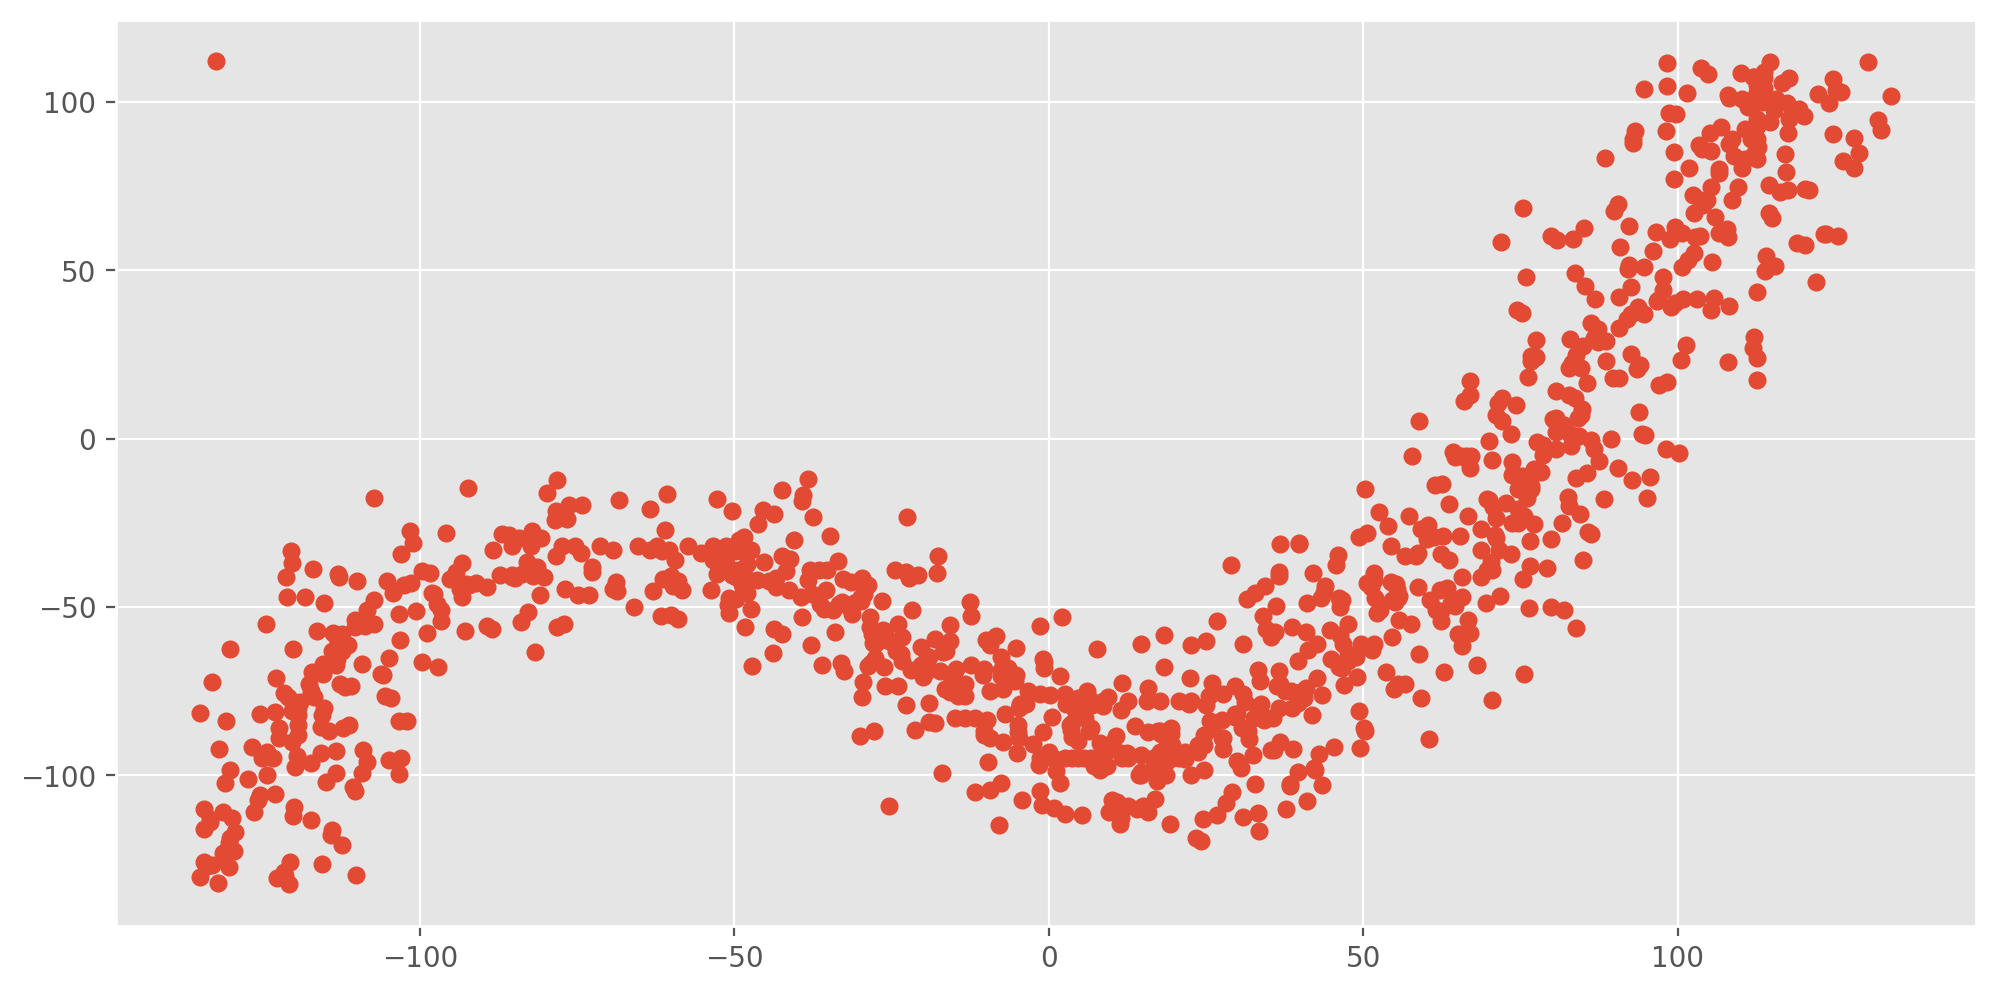

In [79]:
#plotting the dataset with no outliers

plt.figure(figsize=(12,6),dpi=200)
plt.scatter(x='input',y='output',data=df1)

. The relation between input & ouput is non linear

In [80]:
X = df1[['input']].values
Y = df1[['output']].values

In [81]:
X

array([[-122.7406674],
       [-121.5314194],
       [-134.917019 ],
       ...,
       [ 115.2538998],
       [ 117.3661993],
       [-132.3592378]])

In [85]:
Y

array([[-130.5720846 ],
       [-129.9389289 ],
       [-130.1418321 ],
       ...,
       [  97.55392008],
       [  99.54481995],
       [ 112.2467158 ]])

### First, we use a linear function then observe the results

#### Y' = B0 + B1 * X

In [87]:
from sklearn.linear_model import LinearRegression #importing LinearRegression class from sklearn 
lin_reg = LinearRegression()  #creating an object 
lin_reg.fit(X, Y)  #fitting X & Y to the model

LinearRegression()

In [88]:
lin_reg.score(X, Y)  #score is very low

0.4050084311208553

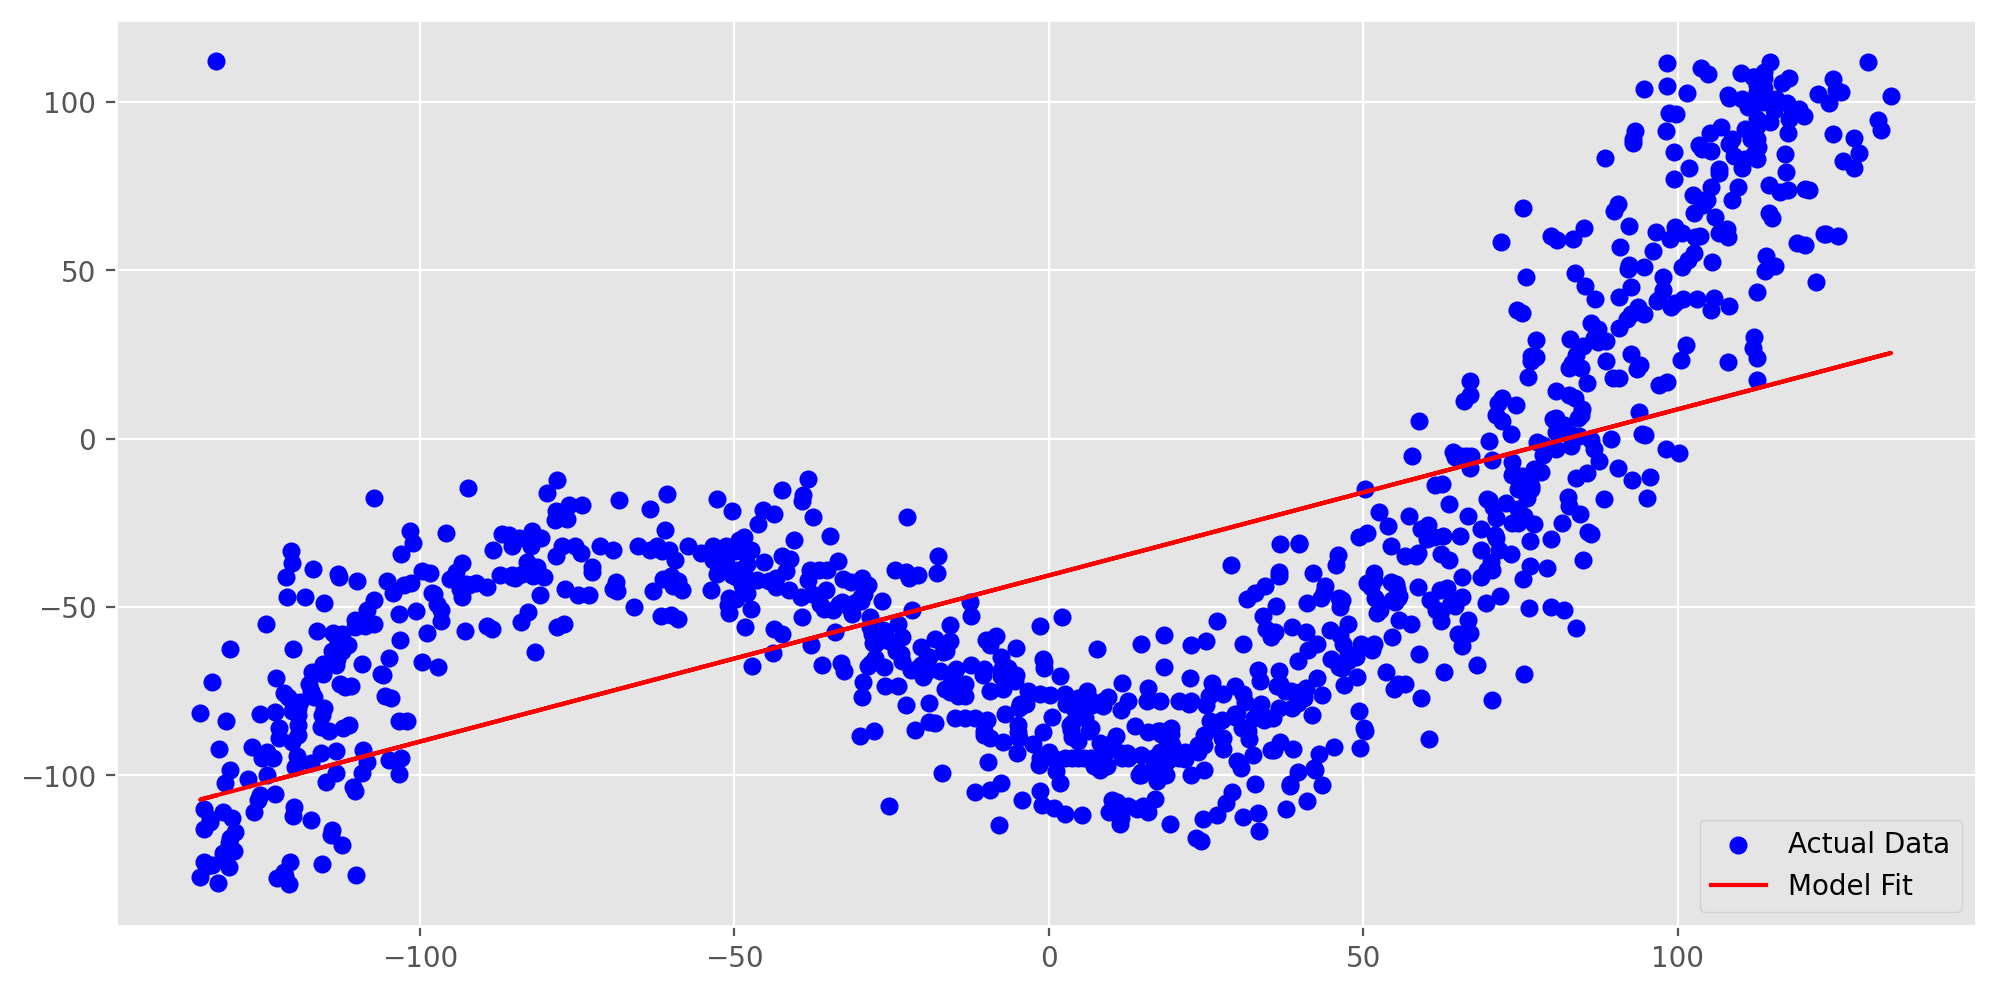

In [89]:
# plotting the Linear model 

pred1 = lin_reg.predict(X)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred1, c = 'r', label = 'Model Fit')
plt.legend()

#### Linear function is not capable of capturing non linear relationships.Hence,we use polynomial Regression

#### Polynomial regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. It is used when the relationship between the independent and dependent variables is not linear. In contrast to simple linear regression, which models the relationship as a straight line, polynomial regression models the relationship as a curved line

#### .We introduce some higher degree variables

#### .Adding higher degree terms will make our model non linear and it will have the ability to capture non linear relationships

## Ploynomial Regression (with Degree 2)

#### The SKlearn PolynomialFeatures class from sklearn library can be used to accomplish the task of introducing higher degree terms.

In [129]:
#adding polynomial features 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly2 = poly.fit_transform(X)
X_poly2

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04],
       ...,
       [ 1.00000000e+00,  1.15253900e+02,  1.32834614e+04],
       [ 1.00000000e+00,  1.17366199e+02,  1.37748247e+04],
       [ 1.00000000e+00, -1.32359238e+02,  1.75189678e+04]])

#### Y'  = B0 + B1 * X + B2 * X^2
- Let X = X1  and X^2 = X2

#### Y'  = B0 + B1 * X1 + B2 * X2

In [92]:
#
poly_reg2 = LinearRegression()
poly_reg2.fit(X_poly2, Y)

poly_reg2.score(X_poly2, Y) #checking score

0.6522591298247657

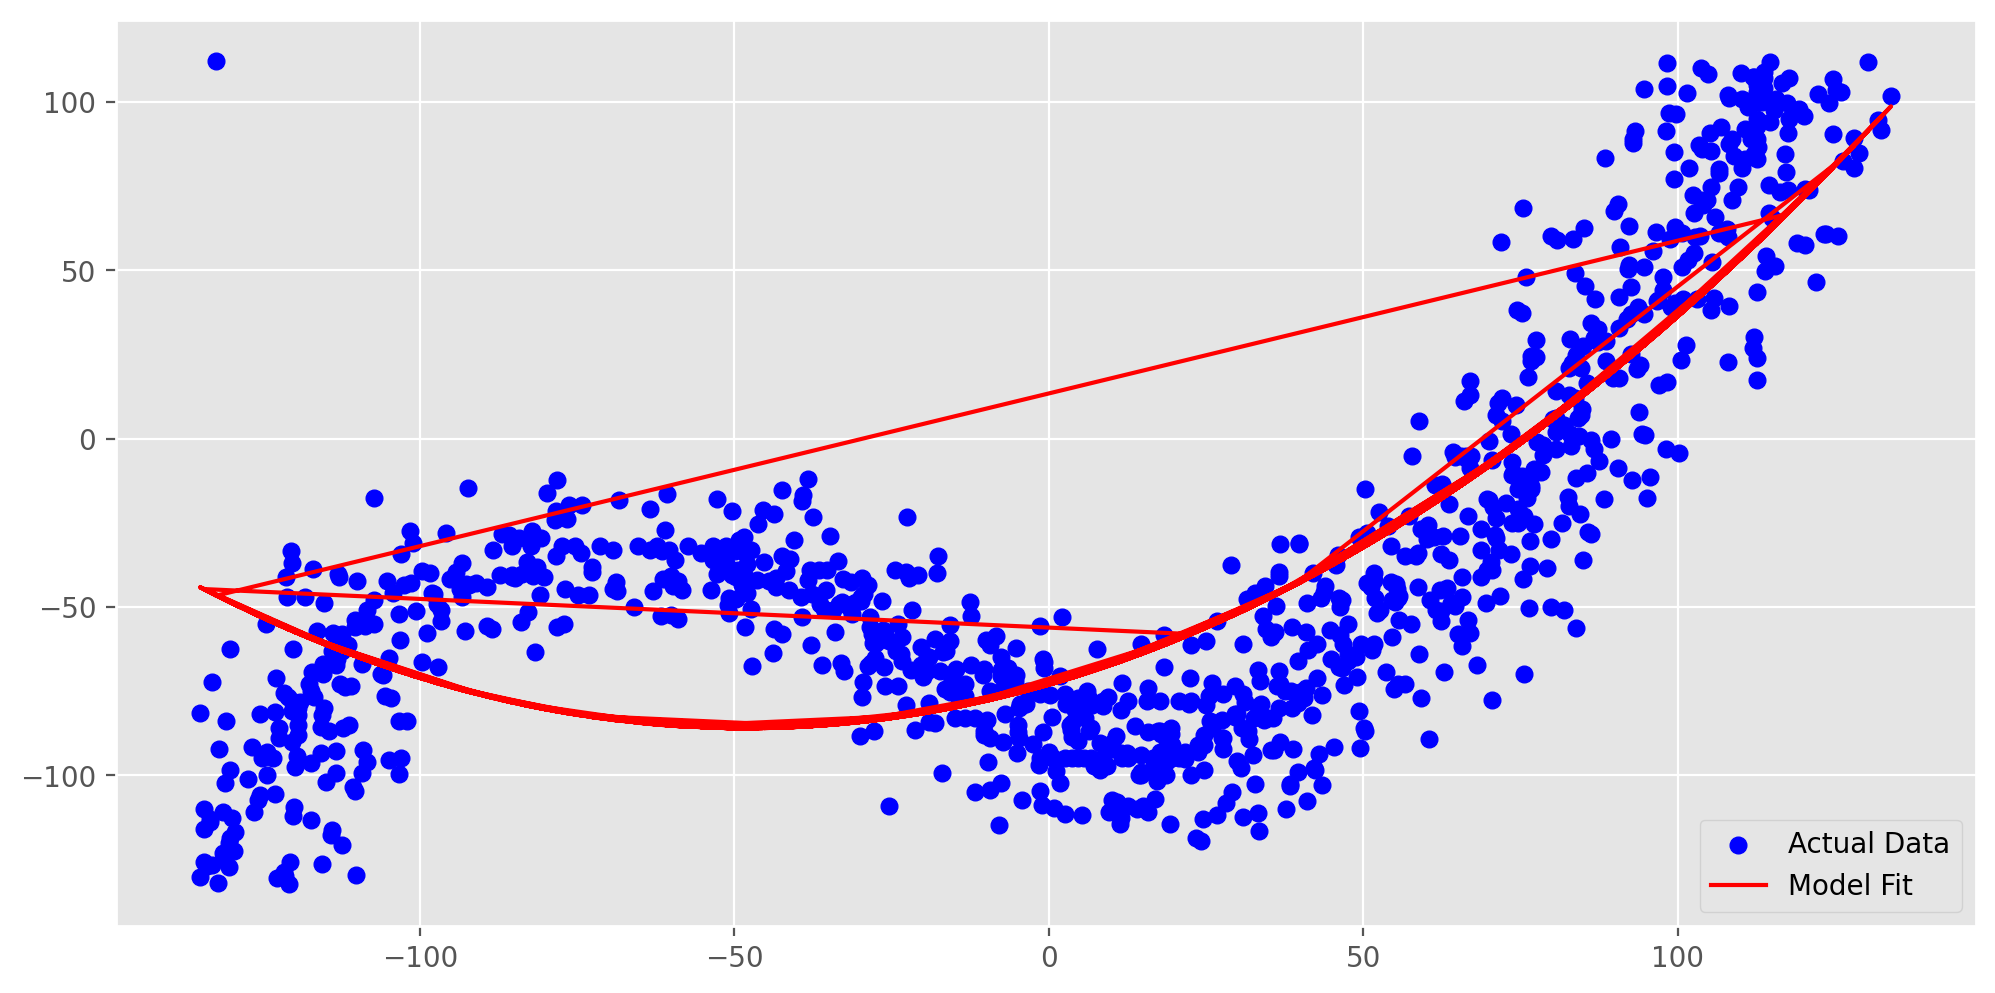

In [93]:
#visualization for degree2
pred2 = poly_reg2.predict(X_poly2)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred2, c = 'r', label = 'Model Fit')
plt.legend()

## Polynomial Regression ( With Degree 3)

In [94]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_poly3 = poly.fit_transform(X)
X_poly3

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04,
        -1.84912147e+06],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04,
        -1.79500520e+06],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04,
        -2.45584080e+06],
       ...,
       [ 1.00000000e+00,  1.15253900e+02,  1.32834614e+04,
         1.53097073e+06],
       [ 1.00000000e+00,  1.17366199e+02,  1.37748247e+04,
         1.61669883e+06],
       [ 1.00000000e+00, -1.32359238e+02,  1.75189678e+04,
        -2.31879723e+06]])

#### Y'  = B0 + B1 * X + B2 * X^2+B3 * X^3
- Let X = X1  and X^2 = X2 and X^3=x3

#### Y'  = B0 + B1 * X1 + B2 * X2 + B3 *X3

In [95]:
poly_reg3 = LinearRegression()
poly_reg3.fit(X_poly3, Y)

poly_reg3.score(X_poly3, Y)

0.8041009528849293

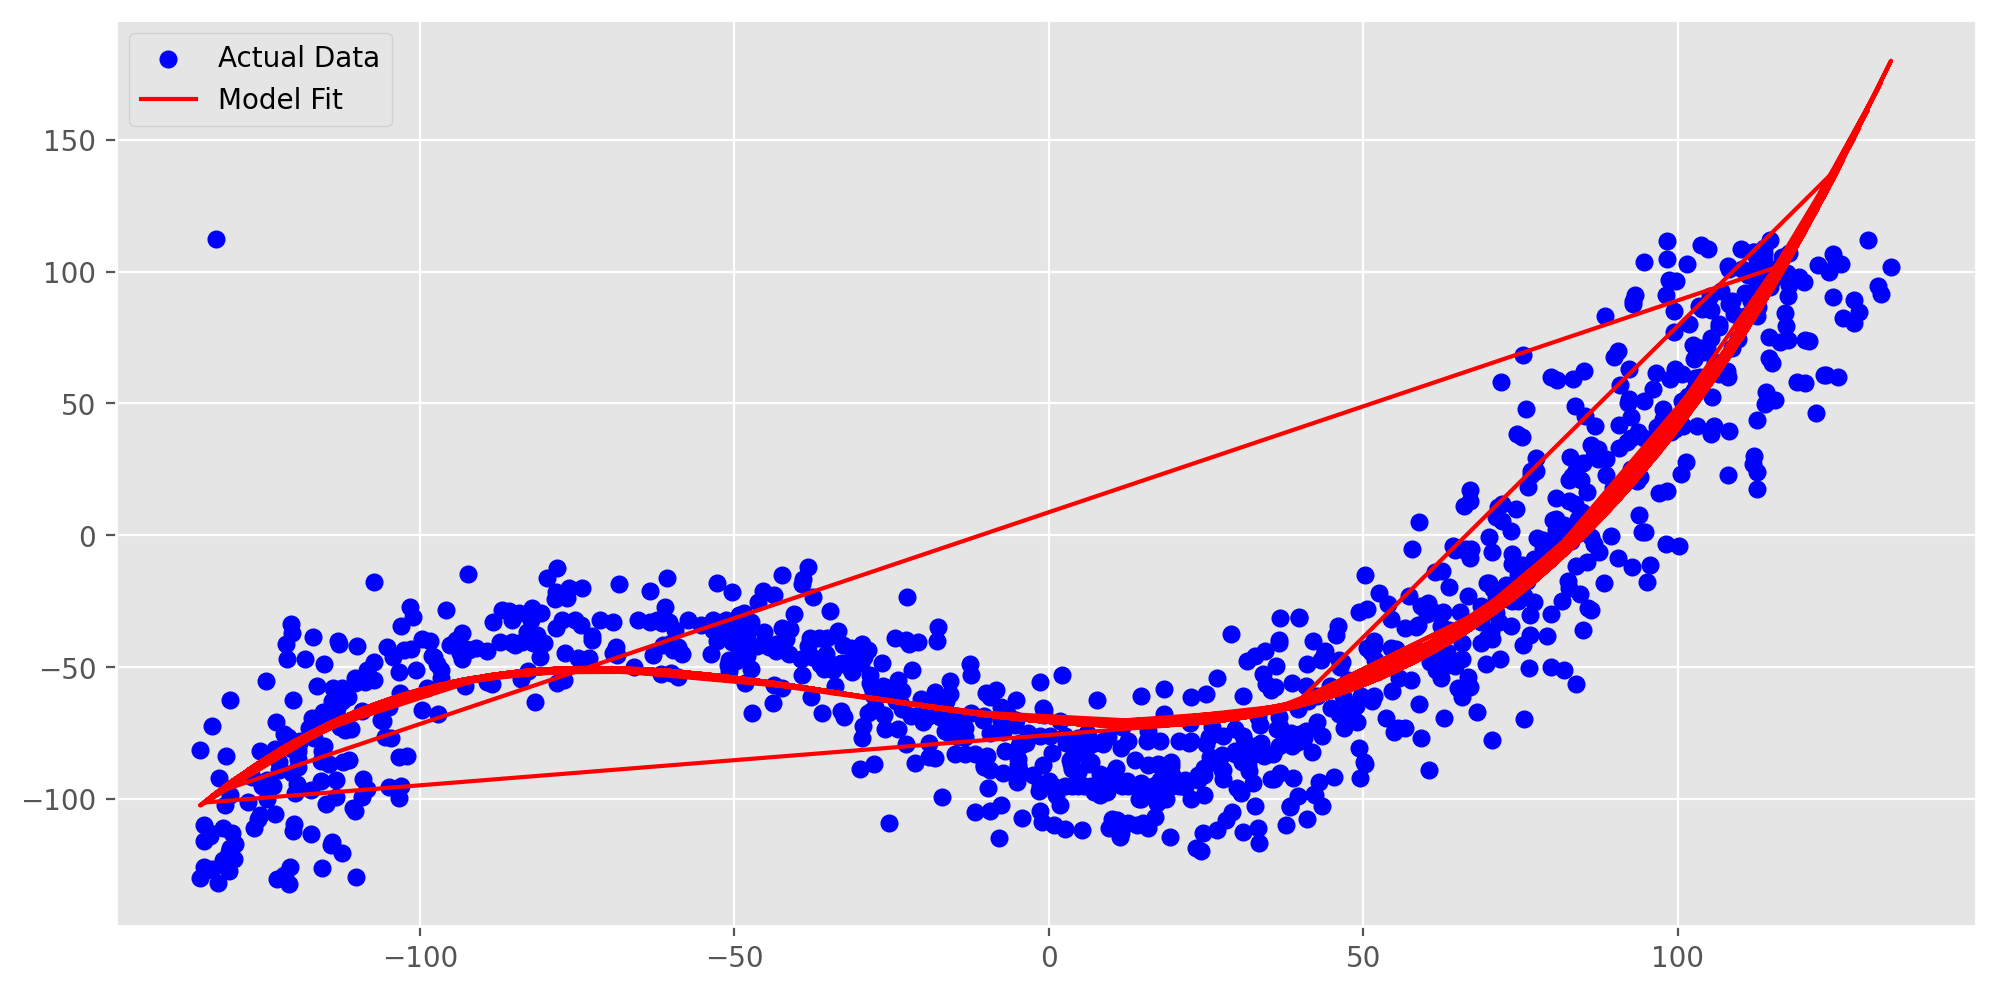

In [96]:
pred3 = poly_reg3.predict(X_poly3)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred3, c = 'r', label = 'Model Fit')
plt.legend()

## Polynomial Regression (with Degree 6)

In [97]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 6)
X_poly6 = poly.fit_transform(X)
X_poly6

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
         2.26962403e+08, -2.78575169e+10,  3.41925021e+12],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
         2.18149530e+08, -2.65120220e+10,  3.22204366e+12],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
         3.31334720e+08, -4.47026927e+10,  6.03115404e+12],
       ...,
       [ 1.00000000e+00,  1.15253900e+02,  1.32834614e+04, ...,
         1.76450347e+08,  2.03365906e+10,  2.34387138e+12],
       [ 1.00000000e+00,  1.17366199e+02,  1.37748247e+04, ...,
         1.89745797e+08,  2.22697430e+10,  2.61371509e+12],
       [ 1.00000000e+00, -1.32359238e+02,  1.75189678e+04, ...,
         3.06914234e+08, -4.06229341e+10,  5.37682059e+12]])

#### Y' = B0 + B1*X1 + B2*X2 + B3*X3 + B4*X4 + B5*X5 + B6*X6
###### Where X1 = X, X2 = X^2 , X3 = X^3, X4 = X^4, X5 = X^5 , X6 = X^6

In [98]:
poly_reg6 = LinearRegression()
poly_reg6.fit(X_poly6, Y)

poly_reg6.score(X_poly6, Y)

0.8608415816436936

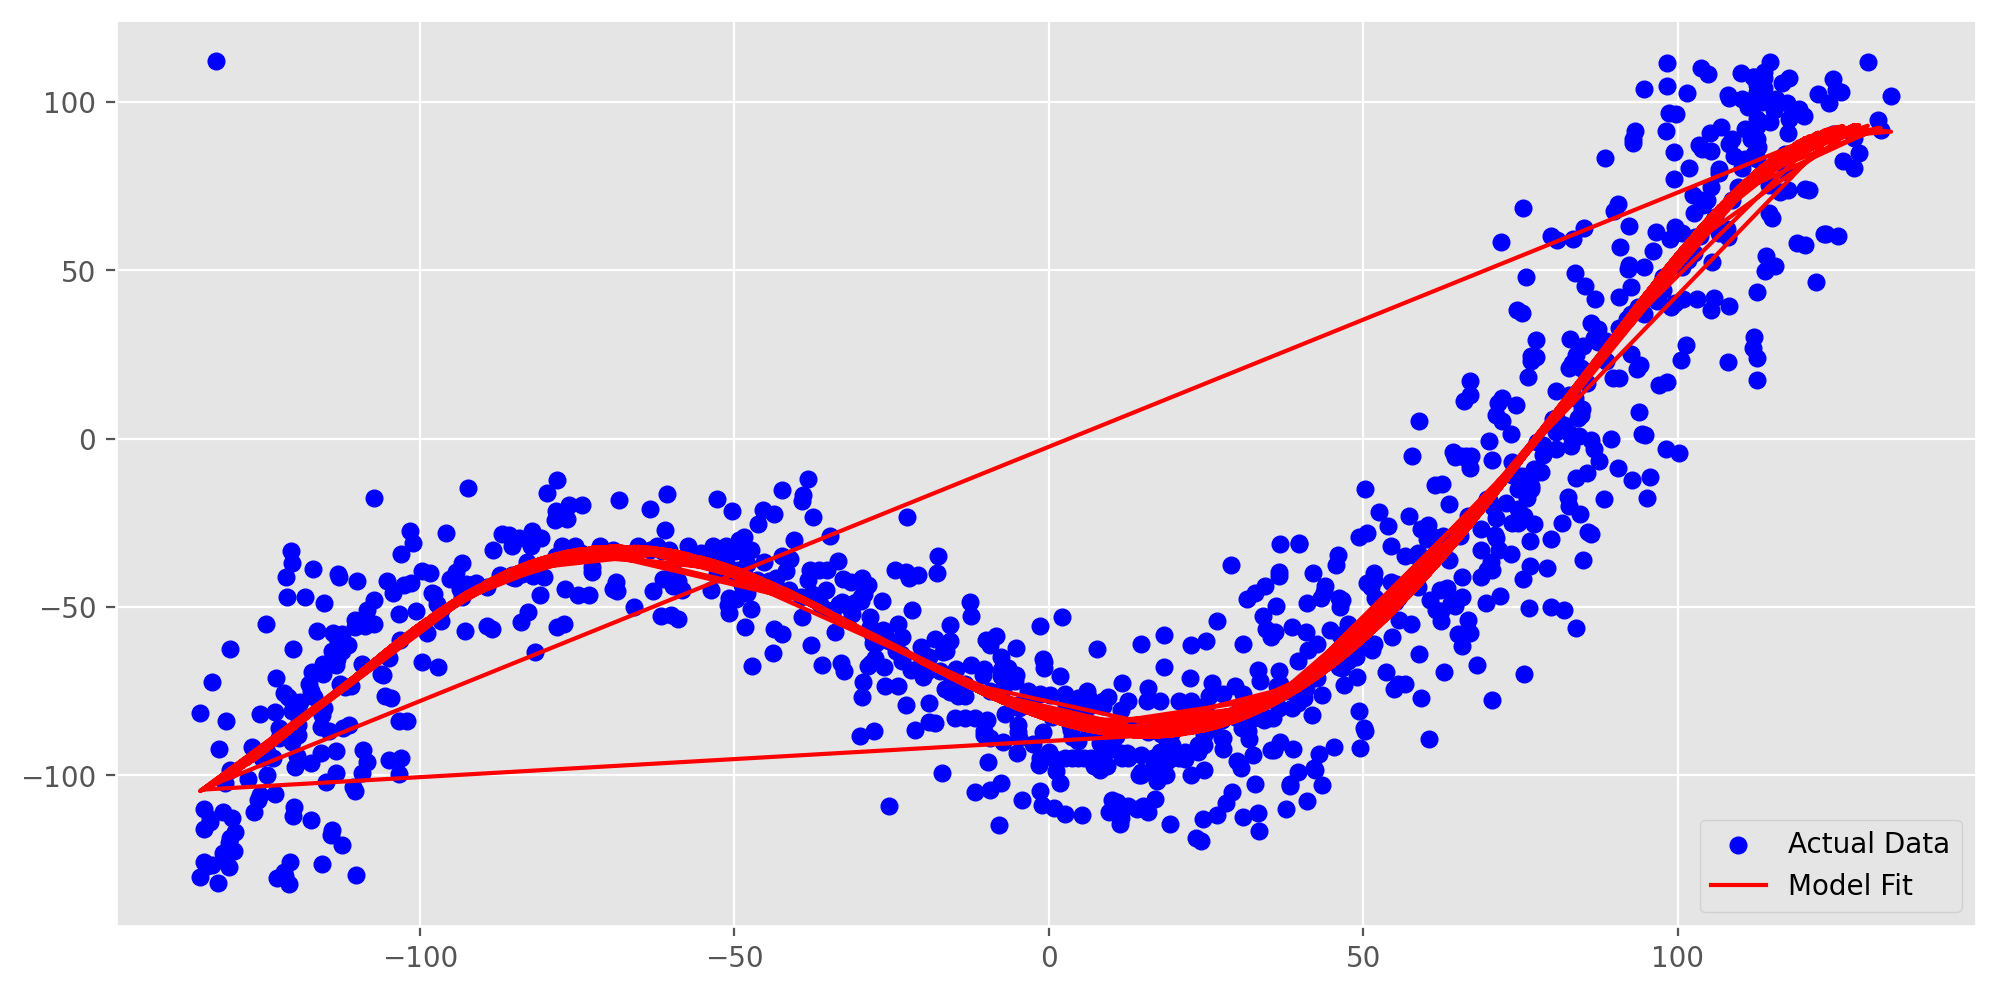

In [99]:
pred6 = poly_reg6.predict(X_poly6)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred6, c = 'r', label = 'Model Fit')
plt.legend()

## Polynomial regression with (Degree 8)

In [125]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 8)
X_poly8 = poly.fit_transform(X)
X_poly8

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
         3.41925021e+12, -4.19681053e+14,  5.15119325e+16],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
         3.22204366e+12, -3.91579539e+14,  4.75892172e+16],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
         6.03115404e+12, -8.13705325e+14,  1.09782697e+17],
       ...,
       [ 1.00000000e+00,  1.15253900e+02,  1.32834614e+04, ...,
         2.34387138e+12,  2.70140317e+14,  3.11347251e+16],
       [ 1.00000000e+00,  1.17366199e+02,  1.37748247e+04, ...,
         2.61371509e+12,  3.06761806e+14,  3.60034673e+16],
       [ 1.00000000e+00, -1.32359238e+02,  1.75189678e+04, ...,
         5.37682059e+12, -7.11671875e+14,  9.41963469e+16]])

#### Y' = B0 + B1*X1 + B2*X2 + B3*X3 + B4*X4 + B5*X5 + B6*X6 +B8*x8
###### Where X1 = X, X2 = X^2 , X3 = X^3, X4 = X^4, X5 = X^5 , X6 = X^6 , X8=X^8

In [126]:
poly_reg8 = LinearRegression()
poly_reg8.fit(X_poly8, Y)

poly_reg8.score(X_poly8, Y)

0.8609468454866638

#### There is no much improvement in the score with degree 6 and 8 in polynomial regression. so, we stop using polynomial regression at degree 6.

### Comparing different models of Polynomial regression with degree(2,3,6) & simple linear regression

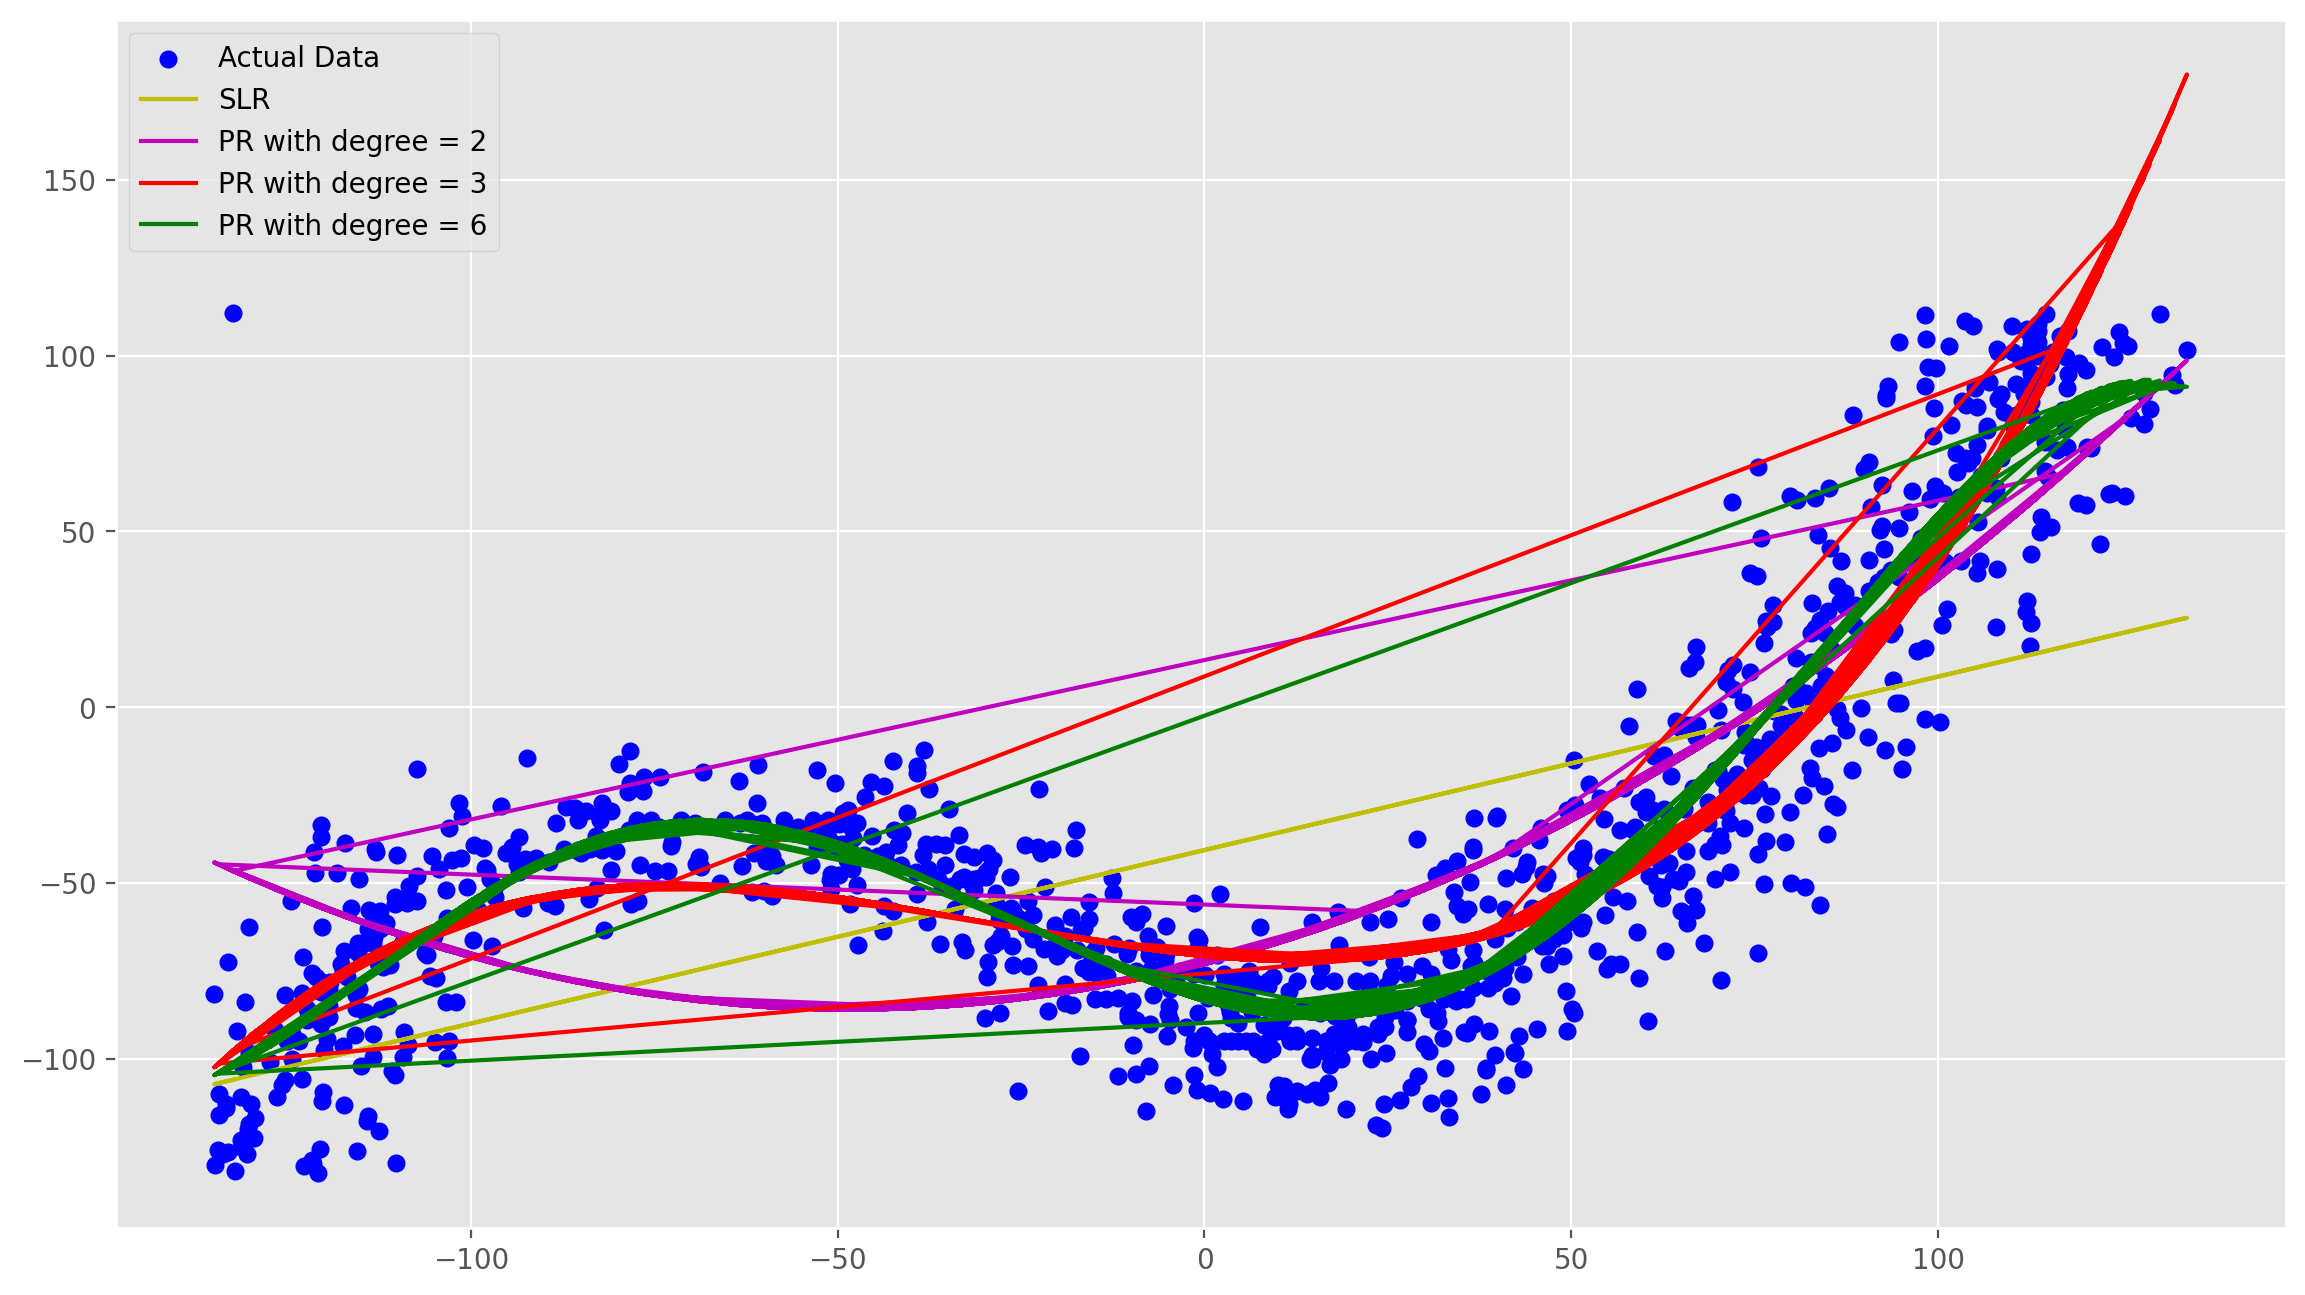

In [100]:
plt.figure(figsize = (14,8), dpi = 200)
plt.scatter(X, Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred1, c = 'y', label = 'SLR')
plt.plot(X, pred2, c = 'm', label = 'PR with degree = 2')
plt.plot(X, pred3, c = 'r', label = 'PR with degree = 3')
plt.plot(X, pred6, c = 'g', label = 'PR with degree = 6')
plt.legend()

#### The polynomial Regression with Degree 6 gives the score of 0.86, which is descent value for making predictions

### 2.Support Vector Regressor Model

#### Y = m * x + b

m= slope

b=intercept

In [103]:
# splitting the data into train test using train_test_split function
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [104]:
#SCALING Using StandardScaler instead of minmax scaler
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_train=SC.fit_transform(x_train)
x_test=SC.transform(x_test)
y_train=SC.fit_transform(y_train)

In [105]:
y_train

array([[-6.83766802e-01],
       [-3.01128082e-01],
       [-1.35757755e+00],
       [ 2.48373881e+00],
       [ 6.27200472e-02],
       [-6.72944491e-01],
       [-5.31562029e-01],
       [-7.31422704e-01],
       [-8.08489954e-02],
       [ 6.13449278e-01],
       [ 3.08623776e-01],
       [-4.22368206e-01],
       [ 2.26864744e+00],
       [ 4.19809888e-01],
       [ 2.14818611e+00],
       [-4.19340108e-01],
       [-3.99520685e-02],
       [-1.59217458e+00],
       [-1.01382065e-01],
       [-1.12123403e+00],
       [ 4.56080279e-02],
       [-6.87242147e-01],
       [-5.08276982e-01],
       [ 1.65801106e+00],
       [ 1.69427084e+00],
       [-6.32040600e-01],
       [-1.15776302e-01],
       [-1.83194514e-01],
       [-7.72747544e-01],
       [ 2.20172246e+00],
       [-3.23503307e-01],
       [ 1.32900948e+00],
       [ 8.98767987e-01],
       [ 1.39745755e+00],
       [-6.30109878e-01],
       [ 1.67124986e+00],
       [-1.12525788e+00],
       [-7.27102749e-01],
       [ 7.9

In [108]:
#Support vector regression model
from sklearn.svm import SVR
regressor=SVR(kernel='rbf') #since,the data is non-linear, we use rbf kernal
regressor.fit(x_train,y_train)

SVR()

In [109]:
y_pred= regressor.predict(x_test)

In [115]:
y_pred= SC.inverse_transform(y_pred.reshape(-1,1))

In [116]:
y_pred

array([[ -84.94857557],
       [ -89.10613904],
       [ -68.26228581],
       [  69.64553037],
       [ -71.66130571],
       [ -87.67717692],
       [ -82.76314821],
       [ -49.70234265],
       [ -75.90585889],
       [ -36.00026663],
       [  85.73005638],
       [  89.54076651],
       [   9.55438548],
       [ -78.80450755],
       [  77.18234868],
       [  90.01097949],
       [ -77.82536708],
       [ -33.77727671],
       [  27.27832672],
       [ -42.43381546],
       [ -35.09604332],
       [ -34.6519033 ],
       [ -74.6833416 ],
       [ -30.98372637],
       [ -43.6638552 ],
       [  90.22306271],
       [ -74.13750359],
       [ -73.60497987],
       [ -63.27891711],
       [  53.76536474],
       [ -54.99293828],
       [  84.71429507],
       [   1.77331775],
       [ -84.75374178],
       [  63.36886363],
       [ -50.69597232],
       [ -78.8683427 ],
       [ -74.16048185],
       [ -83.23480872],
       [ -86.28346239],
       [ -64.79719743],
       [ -48.766

In [117]:
#evaluation 
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8665745912495464


#### The score for SVM(Regression) model is 0.86 which is simialat to that of Polynomial regression with degree 6.

## We can use either of Polyminal regression or SVM (Regreesion) model to make predictions as they both perform similar

#### There are many other regression models to make predictions on non-linear data 

### 3.Decision Tree Regression: Decision tree algorithms can be used for regression tasks by predicting the average value of the target variable for each leaf node in the tree. The tree structure allows for the capture of non-linear relationships between the features and the target variable.



### 4.Random Forest Regression: This is an ensemble method that combines multiple decision trees to make predictions. Random forests are more robust and perform better than single decision trees, especially when dealing with non-linear data.



### 5.Artificial Neural Networks: Artificial neural networks (ANNs) are highly flexible models that can handle non-linear data by using multiple layers of interconnected nodes. ANNs can be used for regression tasks by using the mean squared error loss function during training.



# THANK YOU